<a href="https://colab.research.google.com/github/zjc664656505/BQ_PROJECT/blob/main/BQ_DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load data

In [7]:
#Mount to your google drive
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


In [8]:
#define method for feature selection
def feature_selection(dataframe, feature_list):
  '''
    This is a method which returns the new dataframe in which the features are selected
  '''
  return dataframe[feature_list]

In [3]:
# Financial feature list
companies_variables_feature_list = ['bq_id', 'bq_year', 'bq_revenue', 'bq_ebitda', 'bq_cor', 'bq_net_income', 
                           'bq_gross_profit', 'bq_total_assets','bq_operating_expenses',
                           'bq_operating_income',  'bq_tax_and_interest',
                           'bq_gross_profit_margin', 'bq_ebitda_margin', 'bq_asset_turnover',
                           'bq_net_profit_margin', 'bq_return_on_assets', 'bq_return_on_sales']

In [ ]:
company_variables_ts_df1 = feature_selection(pd.read_csv('/content/drive/MyDrive/BrightQuery_Project/cleaned_data/company_variables_ts_1.csv'), companies_variables_feature_list)
company_variables_ts_df2 = feature_selection(pd.read_csv('/content/drive/MyDrive/BrightQuery_Project/cleaned_data/company_variables_ts_2.csv'), companies_variables_feature_list)
company_variables_ts_df3 = feature_selection(pd.read_csv('/content/drive/MyDrive/BrightQuery_Project/cleaned_data/company_variables_ts_3.csv'), companies_variables_feature_list)
company_variables_ts_df4 = feature_selection(pd.read_csv('/content/drive/MyDrive/BrightQuery_Project/cleaned_data/company_variables_ts_4.csv'), companies_variables_feature_list)
company_variables_ts_df5 = feature_selection(pd.read_csv('/content/drive/MyDrive/BrightQuery_Project/cleaned_data/company_variables_ts_5.csv'), companies_variables_feature_list)
company_variables_ts_df6 = feature_selection(pd.read_csv('/content/drive/MyDrive/BrightQuery_Project/cleaned_data/company_variables_ts_6.csv'), companies_variables_feature_list)
company_variables_ts_df7 = feature_selection(pd.read_csv('/content/drive/MyDrive/BrightQuery_Project/cleaned_data/company_variables_ts_7.csv'), companies_variables_feature_list)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (102) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
company_variables_ts_df1 = company_variables_ts_df1[(company_variables_ts_df1.bq_year >= 2015) & (company_variables_ts_df1.bq_year <= 2020)]
company_variables_ts_df2 = company_variables_ts_df2[(company_variables_ts_df2.bq_year >= 2015) & (company_variables_ts_df2.bq_year <= 2020)]
company_variables_ts_df3 = company_variables_ts_df3[(company_variables_ts_df3.bq_year >= 2015) & (company_variables_ts_df3.bq_year <= 2020)]
company_variables_ts_df4 = company_variables_ts_df4[(company_variables_ts_df4.bq_year >= 2015) & (company_variables_ts_df4.bq_year <= 2020)]
company_variables_ts_df5 = company_variables_ts_df5[(company_variables_ts_df5.bq_year >= 2015) & (company_variables_ts_df5.bq_year <= 2020)]
company_variables_ts_df6 = company_variables_ts_df6[(company_variables_ts_df6.bq_year >= 2015) & (company_variables_ts_df6.bq_year <= 2020)]
company_variables_ts_df7 = company_variables_ts_df7[(company_variables_ts_df7.bq_year >= 2015) & (company_variables_ts_df7.bq_year <= 2020)]

In [ ]:
# Combine the 7 company_variables_ts_df dataframes together
company_variables_ts_df = pd.concat([company_variables_ts_df1, company_variables_ts_df2, company_variables_ts_df3, company_variables_ts_df4, 
                company_variables_ts_df5, company_variables_ts_df6, company_variables_ts_df7], ignore_index=True)

In [ ]:
company_variables_ts_df = company_variables_ts_df.dropna()

In [ ]:
company_variables_ts_df.to_csv('/content/drive/MyDrive/BrightQuery_Project/prepro_data/financials_data.csv', index=False)

## Important Sectors

In [9]:
num_com_sectors = pd.read_excel('/content/drive/MyDrive/BrightQuery_Project/prepro_data/numberOfCompaniesInSectors.xlsx')
num_com_sectors

,Sectors,Number of Companies
0,Manufacturing,1047
1,"Professional, Scientific, and Technical Services",588
2,Finance and Insurance,565
3,Information,180
4,Retail Trade,147
5,Real Estate and Rental and Leasing,130
6,Wholesale Trade,131
7,Mining,117
8,Management of Companies (Holding Companies),108
9,Health Care and Social Assistance,84


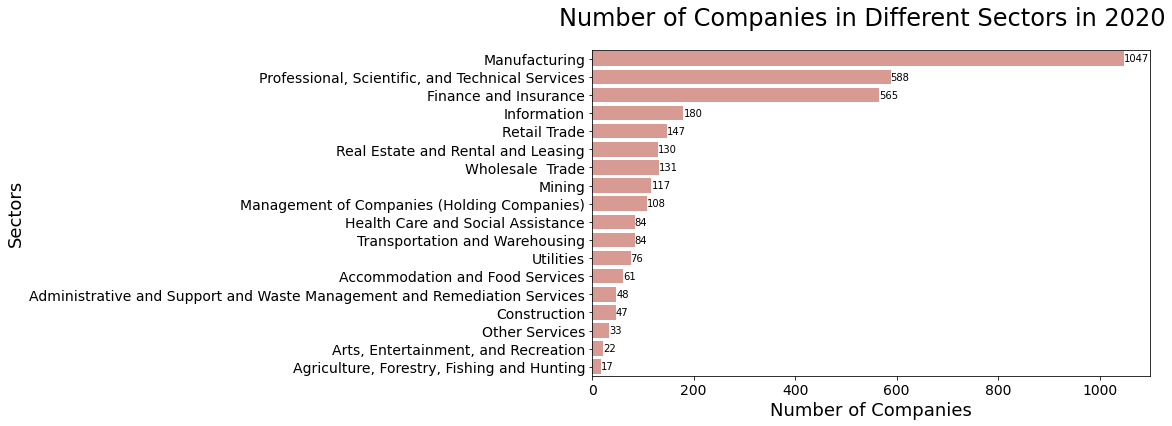

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Number of Companies in Different Sectors in 2020', fontsize=24)
ax = sns.barplot(y="Sectors", x="Number of Companies", data=num_com_sectors, color="salmon", saturation=.5)
ax.set_xlabel("Number of Companies",fontsize=18)
ax.set_ylabel("Sectors",fontsize=18)
ax.tick_params(labelsize=14)
for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2), xytext=(0, 0), 
            textcoords='offset points', ha="left", va="center")

## Pearson Correlations Between Financial Features

In [11]:
company_variables_ts_df = pd.read_csv('/content/drive/MyDrive/BrightQuery_Project/prepro_data/financials_data.csv')

In [12]:
company_variables_ts_df.head(10)

,bq_id,bq_year,bq_revenue,bq_ebitda,bq_cor,bq_net_income,bq_gross_profit,bq_total_assets,bq_operating_expenses,bq_operating_income,bq_tax_and_interest,bq_gross_profit_margin,bq_ebitda_margin,bq_asset_turnover,bq_net_profit_margin,bq_return_on_assets,bq_return_on_sales
0,385968350,2016,21826755.0,1563723.0,11226528.0,437456.0,10600227.0,15065495.0,8806440.0,1793787.0,1356331.0,0.485653,0.071642,1.448791,0.020042,0.029037,0.082183
1,385968350,2020,30895324.0,2264126.0,16059616.0,738735.0,14835708.0,22341285.0,13295732.0,1539976.0,801241.0,0.480193,0.073284,1.382880,0.023911,0.033066,0.049845
2,902965274,2020,8395804.0,2663960.0,1646032.0,1231238.0,6749772.0,56657933.0,4772877.0,1976895.0,745657.0,0.803946,0.317297,0.148184,0.146649,0.021731,0.235462
3,133533004,2020,97606.0,12514.0,54017.0,2101.0,43589.0,206536.0,34919.0,8670.0,6569.0,0.446581,0.128209,0.472586,0.021525,0.010173,0.088827
4,560821475,2020,241957.0,32723.0,143432.0,13493.0,98525.0,196559.0,77756.0,20769.0,7276.0,0.407200,0.135243,1.230964,0.055766,0.068646,0.085838
5,392538354,2018,5457687.0,984236.0,3076250.0,374786.0,2381437.0,7673212.0,1647201.0,734236.0,359450.0,0.436345,0.180339,0.711265,0.068671,0.048843,0.134532
6,392538354,2015,3972693.0,659884.0,2228981.0,165366.0,1743712.0,5608031.0,1253988.0,489724.0,324358.0,0.438924,0.166105,0.708394,0.041626,0.029487,0.123273
7,392538354,2016,4975882.0,907818.0,2752433.0,306190.0,2223449.0,7098367.0,1505599.0,717850.0,411660.0,0.446845,0.182444,0.700990,0.061535,0.043135,0.144266
8,392538354,2020,4963714.0,652843.0,2896344.0,-139265.0,2067370.0,9470912.0,1751321.0,316049.0,455314.0,0.416497,0.131523,0.524101,-0.028057,-0.014704,0.063672
9,392538354,2017,5018158.0,939773.0,2822209.0,375623.0,2195949.0,6978073.0,1492609.0,703340.0,327717.0,0.437601,0.187274,0.719132,0.074853,0.053829,0.140159


In [13]:
dataset = company_variables_ts_df.drop(['bq_id', 'bq_year'], axis=1)

In [14]:
corrdata = dataset.corr()
corrdata.round(2)

,bq_revenue,bq_ebitda,bq_cor,bq_net_income,bq_gross_profit,bq_total_assets,bq_operating_expenses,bq_operating_income,bq_tax_and_interest,bq_gross_profit_margin,bq_ebitda_margin,bq_asset_turnover,bq_net_profit_margin,bq_return_on_assets,bq_return_on_sales
bq_revenue,1.00,0.77,0.95,0.61,0.82,0.33,0.81,0.67,0.54,0.00,0.00,-0.01,0.00,0.00,0.00
bq_ebitda,0.77,1.00,0.60,0.90,0.90,0.47,0.78,0.94,0.65,0.02,0.00,-0.02,0.00,0.00,0.00
bq_cor,0.95,0.60,1.00,0.43,0.62,0.17,0.62,0.48,0.40,-0.01,0.00,0.00,0.00,0.00,0.00
bq_net_income,0.61,0.90,0.43,1.00,0.78,0.45,0.63,0.94,0.46,0.02,0.00,-0.02,0.00,0.00,0.00
bq_gross_profit,0.82,0.90,0.62,0.78,1.00,0.55,0.97,0.86,0.67,0.03,0.00,-0.02,0.00,0.00,0.00
bq_total_assets,0.33,0.47,0.17,0.45,0.55,1.00,0.52,0.51,0.42,0.02,0.00,-0.02,0.00,-0.00,0.00
bq_operating_expenses,0.81,0.78,0.62,0.63,0.97,0.52,1.00,0.70,0.57,0.03,-0.00,-0.02,-0.00,0.00,-0.00
bq_operating_income,0.67,0.94,0.48,0.94,0.86,0.51,0.70,1.00,0.73,0.02,0.00,-0.02,0.00,0.00,0.00
bq_tax_and_interest,0.54,0.65,0.40,0.46,0.67,0.42,0.57,0.73,1.00,0.02,-0.00,-0.02,-0.00,-0.00,0.00
bq_gross_profit_margin,0.00,0.02,-0.01,0.02,0.03,0.02,0.03,0.02,0.02,1.00,0.05,-0.64,0.05,-0.00,0.05


In [15]:
dataset.describe()

,bq_revenue,bq_ebitda,bq_cor,bq_net_income,bq_gross_profit,bq_total_assets,bq_operating_expenses,bq_operating_income,bq_tax_and_interest,bq_gross_profit_margin,bq_ebitda_margin,bq_asset_turnover,bq_net_profit_margin,bq_return_on_assets,bq_return_on_sales
count,3.436719e+06,3.436719e+06,3.436719e+06,3.436719e+06,3.436719e+06,3.436719e+06,3.436719e+06,3.436719e+06,3.436719e+06,3.436719e+06,3.436719e+06,3.436719e+06,3.436719e+06,3.436719e+06,3.436719e+06
mean,5.233856e+07,8.652610e+06,3.045173e+07,3.499581e+06,2.188683e+07,1.542308e+08,1.619939e+07,5.687434e+06,2.187854e+06,4.113036e-01,1.040414e-01,1.258204e+00,9.020271e-03,2.800514e-02,5.538686e-02
std,1.604305e+09,2.936969e+08,1.153243e+09,1.648732e+08,6.115843e+08,1.102720e+10,4.416085e+08,2.154298e+08,8.202092e+07,1.880099e-01,1.920591e+01,6.124149e-01,2.026789e+01,4.630711e+01,1.565567e+01
min,-2.008705e+09,-1.519100e+10,-7.687070e+08,-2.235500e+10,-1.280800e+10,6.500000e+02,-5.495512e+09,-1.933900e+10,-1.517811e+10,-7.431911e+01,-2.420700e+04,-3.402154e-01,-2.441400e+04,-8.512864e+04,-2.457700e+04
25%,1.139890e+06,1.457615e+05,5.813260e+05,4.721500e+04,4.339095e+05,9.785320e+05,3.327410e+05,8.905800e+04,3.299700e+04,3.062157e-01,9.627987e-02,9.088349e-01,3.008025e-02,3.406980e-02,5.959899e-02
50%,3.137895e+06,4.151730e+05,1.714335e+06,1.509810e+05,1.156882e+06,2.880131e+06,8.824190e+05,2.566250e+05,9.683400e+04,3.884893e-01,1.246826e-01,1.223154e+00,4.646741e-02,5.174280e-02,7.946022e-02
75%,9.912448e+06,1.290068e+06,5.740420e+06,4.860500e+05,3.638321e+06,9.907153e+06,2.783170e+06,8.248990e+05,3.322925e+05,4.718245e-01,1.681742e-01,1.569494e+00,6.835156e-02,7.558525e-02,1.064414e-01
max,5.487430e+11,8.380600e+10,4.128020e+11,5.953100e+10,1.527570e+11,3.985749e+12,1.298580e+11,7.123000e+10,2.955900e+10,4.253057e+00,1.060404e+03,2.318352e+01,1.056466e+03,1.273217e+02,1.008538e+02


[Text(0.5, 0, 'bq_revenue'),
 Text(1.5, 0, 'bq_ebitda'),
 Text(2.5, 0, 'bq_cor'),
 Text(3.5, 0, 'bq_net_income'),
 Text(4.5, 0, 'bq_gross_profit'),
 Text(5.5, 0, 'bq_total_assets'),
 Text(6.5, 0, 'bq_operating_expenses'),
 Text(7.5, 0, 'bq_operating_income'),
 Text(8.5, 0, 'bq_tax_and_interest'),
 Text(9.5, 0, 'bq_gross_profit_margin'),
 Text(10.5, 0, 'bq_ebitda_margin'),
 Text(11.5, 0, 'bq_asset_turnover'),
 Text(12.5, 0, 'bq_net_profit_margin'),
 Text(13.5, 0, 'bq_return_on_assets'),
 Text(14.5, 0, 'bq_return_on_sales')]

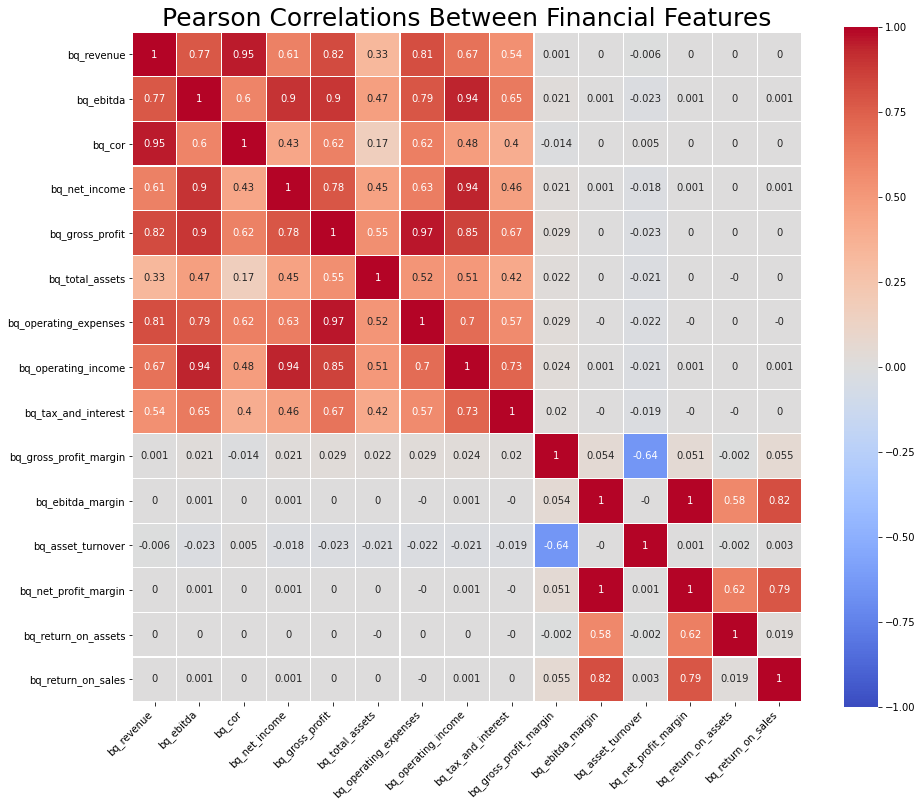

In [16]:
colormap = plt.cm.coolwarm
# mask = np.triu(np.ones_like(corrdata.round(3), dtype=np.bool))
plt.figure(figsize=(6*2.5,5*2.5));
plt.title('Pearson Correlations Between Financial Features', y=1, size=25);
g = sns.heatmap(corrdata.round(3), linewidths=0.1, vmin = -1.0, vmax=1.0, square=True, cmap=colormap, center = 0, linecolor='white', annot=True);
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [ ]:
companies_feature_list = ['bq_id', 'bq_sector_name', 'bq_company_address1_state','bq_company_name', 'bq_public_indicator']
companies_df1 = feature_selection(pd.read_csv('/content/drive/MyDrive/BrightQuery_Project/cleaned_data/companies_1.csv'), companies_feature_list)
companies_df2 = feature_selection(pd.read_csv('/content/drive/MyDrive/BrightQuery_Project/cleaned_data/companies_2.csv'), companies_feature_list)
companies_df3 = feature_selection(pd.read_csv('/content/drive/MyDrive/BrightQuery_Project/cleaned_data/companies_3.csv'), companies_feature_list)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (58,59,60) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (59) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
companies_df = pd.concat([companies_df1, companies_df2, companies_df3], ignore_index=True)
companies_df.head(10)

,bq_id,bq_sector_name,bq_company_address1_state,bq_company_name,bq_public_indicator
0,777704001,"Professional, Scientific, and Technical Services",NJ,JAY G TRACHTENBERG,0
1,699258395,Retail Trade,CA,"DARRELL WILLIAMS CHEVRON, INC.",0
2,298415539,"Professional, Scientific, and Technical Services",TN,"C2RL, INC. ENGINEERS",0
3,312414242,Health Care and Social Assistance,PR,ELIASIN MUNOZ/ LAURA MATA,0
4,289867643,Construction,FL,HI-TECH ROOFING & SHEETMETAL INC.,0
5,204048886,Information,OH,DYNAMICS ONLINE,0
6,457397418,Construction,GA,"AQS, INC. KOTZE",0
7,777141037,Construction,KY,RIO GRANDE FENCE COMPANY,0
8,758186446,Finance and Insurance,WI,ALLIANCE BANK,0
9,717493456,"Professional, Scientific, and Technical Services",DE,ATLANTIC VETERINARY CENTER,0


In [ ]:
public_companies = companies_df[companies_df.bq_public_indicator == 1]
public_companies

,bq_id,bq_sector_name,bq_company_address1_state,bq_public_indicator
13840,131980070,Finance and Insurance,KY,1
17731,983586555,Health Care and Social Assistance,LA,1
26582,795029135,"Arts, Entertainment, and Recreation",PA,1
32977,351856405,"Professional, Scientific, and Technical Services",MA,1
35636,913785945,"Professional, Scientific, and Technical Services",CA,1
...,...,...,...,...
749327,786180452,Finance and Insurance,CA,1
751249,102840051,"Professional, Scientific, and Technical Services",CA,1
751664,217055129,Manufacturing,FL,1
756256,757247657,Manufacturing,NC,1


In [ ]:
df = company_variables_ts_df.merge(public_companies, how='inner', on='bq_id')
df

,bq_id,bq_year,bq_revenue,bq_ebitda,bq_cor,bq_net_income,bq_gross_profit,bq_total_assets,bq_operating_expenses,bq_operating_income,bq_tax_and_interest,bq_gross_profit_margin,bq_ebitda_margin,bq_asset_turnover,bq_net_profit_margin,bq_return_on_assets,bq_return_on_sales,bq_sector_name,bq_company_address1_state,bq_public_indicator
0,412416919,2018,4.903160e+08,1.432950e+08,3.370800e+08,56580000.0,1.532360e+08,1.693671e+09,5.839300e+07,9.484300e+07,38263000.0,0.312525,0.292250,0.289499,0.115395,0.033407,0.193432,Utilities,DE,1
1,412416919,2015,4.592440e+08,1.150010e+08,3.394070e+08,41140000.0,1.198370e+08,1.067421e+09,4.207900e+07,7.775800e+07,36618000.0,0.260944,0.250414,0.430237,0.089582,0.038541,0.169317,Utilities,DE,1
2,412416919,2016,4.988600e+08,1.231480e+08,3.661180e+08,44675000.0,1.327420e+08,1.229219e+09,4.675900e+07,8.598300e+07,41308000.0,0.266091,0.246859,0.405835,0.089554,0.036344,0.172359,Utilities,DE,1
3,412416919,2020,4.831540e+08,1.786940e+08,3.007940e+08,71711000.0,1.823600e+08,1.888088e+09,7.522100e+07,1.071390e+08,35428000.0,0.377437,0.369849,0.255896,0.148423,0.037981,0.221749,Utilities,DE,1
4,412416919,2017,4.496460e+08,1.300450e+08,3.068390e+08,58124000.0,1.428070e+08,1.414934e+09,5.307700e+07,8.973000e+07,31606000.0,0.317599,0.289216,0.317786,0.129266,0.041079,0.199557,Utilities,DE,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18682,950199378,2019,8.005000e+09,8.400000e+08,5.462000e+09,491000000.0,2.543000e+09,6.589000e+09,1.882000e+09,6.610000e+08,170000000.0,0.317676,0.104934,1.214904,0.061337,0.074518,0.082573,Retail Trade,NY,1
18683,950199378,2018,7.939000e+09,8.820000e+08,5.411000e+09,541000000.0,2.528000e+09,3.820000e+09,1.824000e+09,7.040000e+08,163000000.0,0.318428,0.111097,2.078272,0.068145,0.141623,0.088676,Retail Trade,NY,1
18684,950199378,2015,7.412000e+09,9.890000e+08,4.907000e+09,541000000.0,2.505000e+09,3.775000e+09,1.668000e+09,8.370000e+08,296000000.0,0.337965,0.133432,1.963444,0.072990,0.143311,0.112925,Retail Trade,NY,1
18685,950199378,2016,7.766000e+09,1.164000e+09,5.130000e+09,664000000.0,2.636000e+09,3.840000e+09,1.636000e+09,1.000000e+09,336000000.0,0.339428,0.149884,2.022396,0.085501,0.172917,0.128766,Retail Trade,NY,1


In [ ]:
public_dataset = df.drop(['bq_id', 'bq_year', 'bq_sector_name', 'bq_company_address1_state','bq_public_indicator'], axis=1)
public_dataset

,bq_revenue,bq_ebitda,bq_cor,bq_net_income,bq_gross_profit,bq_total_assets,bq_operating_expenses,bq_operating_income,bq_tax_and_interest,bq_gross_profit_margin,bq_ebitda_margin,bq_asset_turnover,bq_net_profit_margin,bq_return_on_assets,bq_return_on_sales
0,4.903160e+08,1.432950e+08,3.370800e+08,56580000.0,1.532360e+08,1.693671e+09,5.839300e+07,9.484300e+07,38263000.0,0.312525,0.292250,0.289499,0.115395,0.033407,0.193432
1,4.592440e+08,1.150010e+08,3.394070e+08,41140000.0,1.198370e+08,1.067421e+09,4.207900e+07,7.775800e+07,36618000.0,0.260944,0.250414,0.430237,0.089582,0.038541,0.169317
2,4.988600e+08,1.231480e+08,3.661180e+08,44675000.0,1.327420e+08,1.229219e+09,4.675900e+07,8.598300e+07,41308000.0,0.266091,0.246859,0.405835,0.089554,0.036344,0.172359
3,4.831540e+08,1.786940e+08,3.007940e+08,71711000.0,1.823600e+08,1.888088e+09,7.522100e+07,1.071390e+08,35428000.0,0.377437,0.369849,0.255896,0.148423,0.037981,0.221749
4,4.496460e+08,1.300450e+08,3.068390e+08,58124000.0,1.428070e+08,1.414934e+09,5.307700e+07,8.973000e+07,31606000.0,0.317599,0.289216,0.317786,0.129266,0.041079,0.199557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18682,8.005000e+09,8.400000e+08,5.462000e+09,491000000.0,2.543000e+09,6.589000e+09,1.882000e+09,6.610000e+08,170000000.0,0.317676,0.104934,1.214904,0.061337,0.074518,0.082573
18683,7.939000e+09,8.820000e+08,5.411000e+09,541000000.0,2.528000e+09,3.820000e+09,1.824000e+09,7.040000e+08,163000000.0,0.318428,0.111097,2.078272,0.068145,0.141623,0.088676
18684,7.412000e+09,9.890000e+08,4.907000e+09,541000000.0,2.505000e+09,3.775000e+09,1.668000e+09,8.370000e+08,296000000.0,0.337965,0.133432,1.963444,0.072990,0.143311,0.112925
18685,7.766000e+09,1.164000e+09,5.130000e+09,664000000.0,2.636000e+09,3.840000e+09,1.636000e+09,1.000000e+09,336000000.0,0.339428,0.149884,2.022396,0.085501,0.172917,0.128766


In [ ]:
public_corr = public_dataset.corr()

[Text(0.5, 0, 'bq_revenue'),
 Text(1.5, 0, 'bq_ebitda'),
 Text(2.5, 0, 'bq_cor'),
 Text(3.5, 0, 'bq_net_income'),
 Text(4.5, 0, 'bq_gross_profit'),
 Text(5.5, 0, 'bq_total_assets'),
 Text(6.5, 0, 'bq_operating_expenses'),
 Text(7.5, 0, 'bq_operating_income'),
 Text(8.5, 0, 'bq_tax_and_interest'),
 Text(9.5, 0, 'bq_gross_profit_margin'),
 Text(10.5, 0, 'bq_ebitda_margin'),
 Text(11.5, 0, 'bq_asset_turnover'),
 Text(12.5, 0, 'bq_net_profit_margin'),
 Text(13.5, 0, 'bq_return_on_assets'),
 Text(14.5, 0, 'bq_return_on_sales')]

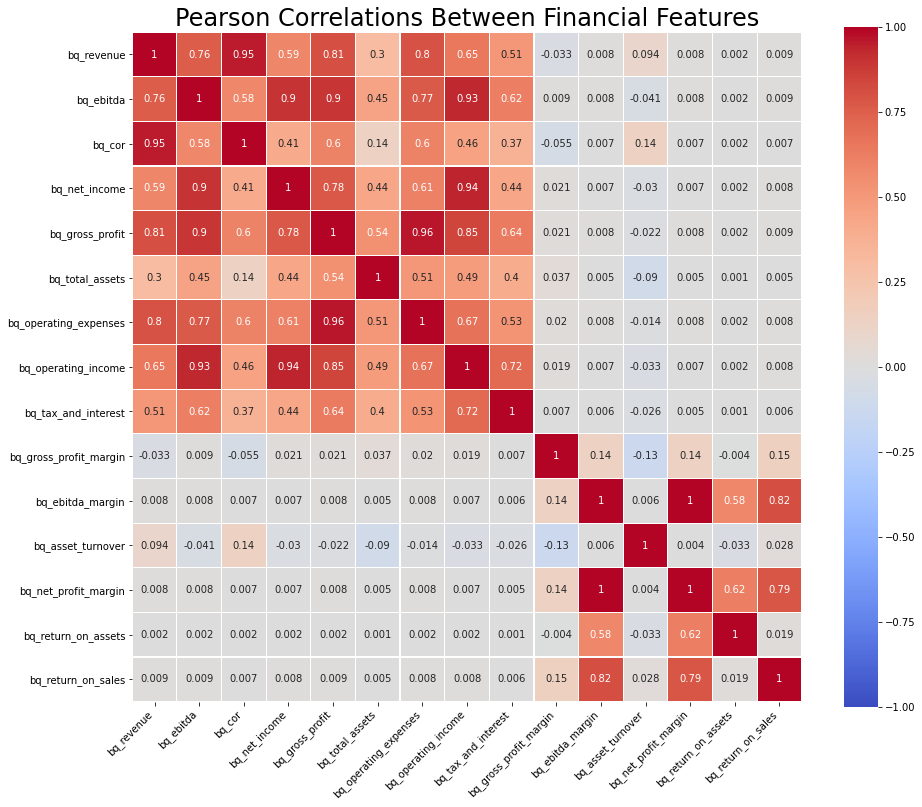

In [ ]:
colormap = plt.cm.coolwarm
# mask = np.triu(np.ones_like(public_corr.round(3), dtype=np.bool))
plt.figure(figsize=(6*2.5,5*2.5));
plt.title('Pearson Correlations Between Financial Features', y=1, size=24);
g = sns.heatmap(public_corr.round(3), linewidths=0.1, vmin = -1.0, vmax=1.0, square=True, cmap=colormap, center=0, linecolor='white', annot=True);
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

## Ebitda Differs In Sectors

In [ ]:
Manufacturing = df[(df.bq_sector_name == "Manufacturing")]
Manufacturing

,bq_id,bq_year,bq_revenue,bq_ebitda,bq_cor,bq_net_income,bq_gross_profit,bq_total_assets,bq_operating_expenses,bq_operating_income,bq_tax_and_interest,bq_gross_profit_margin,bq_ebitda_margin,bq_asset_turnover,bq_net_profit_margin,bq_return_on_assets,bq_return_on_sales,bq_sector_name,bq_company_address1_state,bq_public_indicator
67,827530042,2018,3.811000e+09,1.773000e+09,1.634000e+09,957000000.0,2.177000e+09,1.219747e+10,522000000.0,1.655000e+09,6.980000e+08,0.571241,0.465232,0.312442,0.251115,0.078459,0.434269,Manufacturing,OH,1
68,827530042,2020,5.103000e+09,2.098000e+09,2.456000e+09,699000000.0,2.647000e+09,1.839500e+10,896000000.0,1.751000e+09,1.052000e+09,0.518714,0.411131,0.277412,0.136978,0.037999,0.343131,Manufacturing,OH,1
69,827530042,2016,3.171411e+09,1.370636e+09,1.443348e+09,583414000.0,1.728063e+09,1.072628e+10,460303000.0,1.267760e+09,6.843460e+08,0.544888,0.432185,0.295667,0.183960,0.054391,0.399746,Manufacturing,OH,1
70,827530042,2015,2.707115e+09,1.145907e+09,1.257270e+09,443847000.0,1.449845e+09,8.303935e+09,375843000.0,1.074002e+09,6.301550e+08,0.535568,0.423295,0.326004,0.163956,0.053450,0.396733,Manufacturing,OH,1
71,827530042,2017,3.504286e+09,1.549390e+09,1.519659e+09,596887000.0,1.984627e+09,9.975661e+09,501781000.0,1.482846e+09,8.859590e+08,0.566343,0.442141,0.351284,0.170331,0.059834,0.423152,Manufacturing,OH,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18671,318270525,2019,9.366200e+07,4.805000e+06,7.151300e+07,453000.0,2.214900e+07,5.698700e+07,24082000.0,-1.933000e+06,-2.386000e+06,0.236478,0.051301,1.643568,0.004837,0.007949,-0.020638,Manufacturing,IL,1
18672,318270525,2018,1.033500e+08,4.370000e+05,7.749200e+07,-3086000.0,2.585800e+07,5.680700e+07,28968000.0,-3.110000e+06,-2.400000e+04,0.250198,0.004228,1.819318,-0.029860,-0.054324,-0.030092,Manufacturing,IL,1
18673,318270525,2020,9.960600e+07,9.589000e+06,7.399400e+07,4006000.0,2.561200e+07,5.989600e+07,22530000.0,3.082000e+06,-9.240000e+05,0.257133,0.096269,1.662983,0.040218,0.066883,0.030942,Manufacturing,IL,1
18674,318270525,2016,1.238790e+08,8.877000e+06,8.884700e+07,3479000.0,3.503200e+07,6.521400e+07,28947000.0,6.085000e+06,2.606000e+06,0.282792,0.071659,1.899577,0.028084,0.053347,0.049121,Manufacturing,IL,1


In [ ]:
RetailTrade = df[(df.bq_sector_name == "Retail Trade")]
RetailTrade

,bq_id,bq_year,bq_revenue,bq_ebitda,bq_cor,bq_net_income,bq_gross_profit,bq_total_assets,bq_operating_expenses,bq_operating_income,bq_tax_and_interest,bq_gross_profit_margin,bq_ebitda_margin,bq_asset_turnover,bq_net_profit_margin,bq_return_on_assets,bq_return_on_sales,bq_sector_name,bq_company_address1_state,bq_public_indicator
103,921955386,2018,1.521710e+08,1.151440e+08,3.732400e+07,81970000.0,1.148470e+08,1.835552e+09,5.652000e+06,1.091950e+08,27225000.0,0.754723,0.756675,0.082902,0.538670,0.044657,0.717581,Retail Trade,NY,1
104,921955386,2016,1.278710e+08,9.726100e+07,2.928600e+07,69204000.0,9.858500e+07,1.756509e+09,5.548000e+06,9.303700e+07,23833000.0,0.770972,0.760618,0.072798,0.541202,0.039399,0.727585,Retail Trade,NY,1
105,921955386,2020,2.989530e+08,1.297300e+08,7.307400e+07,54872000.0,2.258790e+08,4.444284e+09,1.196200e+07,2.139170e+08,159045000.0,0.755567,0.433948,0.067267,0.183547,0.012347,0.715554,Retail Trade,NY,1
106,921955386,2015,1.199680e+08,9.530100e+07,3.055600e+07,70791000.0,8.941200e+07,1.633426e+09,5.905000e+06,8.350700e+07,12716000.0,0.745299,0.794387,0.073446,0.590082,0.043339,0.696077,Retail Trade,NY,1
107,921955386,2017,1.377640e+08,1.138390e+08,3.137500e+07,82288000.0,1.063890e+08,1.754176e+09,5.292000e+06,1.010970e+08,18809000.0,0.772255,0.826333,0.078535,0.597311,0.046910,0.733842,Retail Trade,NY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18682,950199378,2019,8.005000e+09,8.400000e+08,5.462000e+09,491000000.0,2.543000e+09,6.589000e+09,1.882000e+09,6.610000e+08,170000000.0,0.317676,0.104934,1.214904,0.061337,0.074518,0.082573,Retail Trade,NY,1
18683,950199378,2018,7.939000e+09,8.820000e+08,5.411000e+09,541000000.0,2.528000e+09,3.820000e+09,1.824000e+09,7.040000e+08,163000000.0,0.318428,0.111097,2.078272,0.068145,0.141623,0.088676,Retail Trade,NY,1
18684,950199378,2015,7.412000e+09,9.890000e+08,4.907000e+09,541000000.0,2.505000e+09,3.775000e+09,1.668000e+09,8.370000e+08,296000000.0,0.337965,0.133432,1.963444,0.072990,0.143311,0.112925,Retail Trade,NY,1
18685,950199378,2016,7.766000e+09,1.164000e+09,5.130000e+09,664000000.0,2.636000e+09,3.840000e+09,1.636000e+09,1.000000e+09,336000000.0,0.339428,0.149884,2.022396,0.085501,0.172917,0.128766,Retail Trade,NY,1


In [ ]:
Mining = df[(df.bq_sector_name == "Mining")]
Mining

,bq_id,bq_year,bq_revenue,bq_ebitda,bq_cor,bq_net_income,bq_gross_profit,bq_total_assets,bq_operating_expenses,bq_operating_income,bq_tax_and_interest,bq_gross_profit_margin,bq_ebitda_margin,bq_asset_turnover,bq_net_profit_margin,bq_return_on_assets,bq_return_on_sales,bq_sector_name,bq_company_address1_state,bq_public_indicator
238,740196293,2020,2.172000e+09,-1.462000e+09,7.330000e+08,-2.163000e+09,1.439000e+09,4.856000e+09,3.094000e+09,-1.655000e+09,5.080000e+08,0.662523,-0.673112,0.447282,-0.995856,-0.445428,-0.761971,Mining,CA,1
239,740196293,2018,3.064000e+09,1.209000e+09,9.120000e+08,3.280000e+08,2.152000e+09,7.158000e+09,1.383000e+09,7.690000e+08,4.410000e+08,0.702350,0.394582,0.428053,0.107050,0.045823,0.250979,Mining,CA,1
240,740196293,2019,2.634000e+09,8.270000e+08,8.950000e+08,-2.800000e+07,1.739000e+09,6.958000e+09,1.310000e+09,4.290000e+08,4.570000e+08,0.660213,0.313971,0.378557,-0.010630,-0.004024,0.162870,Mining,CA,1
241,740196293,2017,2.006000e+09,6.210000e+08,8.760000e+08,-2.660000e+08,1.130000e+09,6.207000e+09,1.057000e+09,7.300000e+07,3.390000e+08,0.563310,0.309571,0.323184,-0.132602,-0.042855,0.036391,Mining,CA,1
371,787069145,2019,8.372810e+08,-3.191000e+06,2.840190e+08,-3.424590e+08,5.532620e+08,2.264437e+09,9.618530e+08,-4.085910e+08,-6.613200e+07,0.660784,-0.003811,0.369752,-0.409013,-0.151234,-0.487997,Mining,OK,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18629,141018875,2018,8.843448e+10,2.499655e+10,6.393333e+10,4.742529e+09,2.450115e+10,1.360609e+11,1.302644e+10,1.147471e+10,6.732184e+09,0.277054,0.282656,0.649962,0.053628,0.034856,0.129754,Mining,TX,1
18630,141018875,2016,5.967684e+10,1.502105e+10,4.555579e+10,-1.533684e+09,1.412105e+10,1.311000e+11,1.185053e+10,2.270526e+09,3.804211e+09,0.236625,0.251707,0.455201,-0.025700,-0.011699,0.038047,Mining,TX,1
18631,141018875,2015,7.984582e+10,1.389034e+10,6.172421e+10,-1.017698e+10,1.812161e+10,1.509240e+11,2.146145e+10,-3.339848e+09,6.837134e+09,0.226957,0.173964,0.529047,-0.127458,-0.067431,-0.041829,Mining,TX,1
18632,141018875,2017,8.520648e+10,2.426170e+10,6.188235e+10,4.050420e+09,2.332413e+10,1.379688e+11,1.370588e+10,9.618247e+09,5.567827e+09,0.273737,0.284740,0.617578,0.047537,0.029358,0.112882,Mining,TX,1


In [ ]:
Construction = df[(df.bq_sector_name == "Construction")]
Construction

,bq_id,bq_year,bq_revenue,bq_ebitda,bq_cor,bq_net_income,bq_gross_profit,bq_total_assets,bq_operating_expenses,bq_operating_income,bq_tax_and_interest,bq_gross_profit_margin,bq_ebitda_margin,bq_asset_turnover,bq_net_profit_margin,bq_return_on_assets,bq_return_on_sales,bq_sector_name,bq_company_address1_state,bq_public_indicator
657,967622468,2016,7.199410e+08,164622000.0,1.395350e+08,77877000.0,580406000.0,1.128632e+09,419930000.0,160476000.0,82599000.0,0.806186,0.228660,0.637888,0.108171,0.069001,0.222902,Construction,FL,1
658,967622468,2020,5.402760e+08,69405000.0,1.473850e+08,11826000.0,392891000.0,1.213804e+09,336517000.0,56374000.0,44548000.0,0.727204,0.128462,0.445110,0.021889,0.009743,0.104343,Construction,FL,1
659,967622468,2015,6.176480e+08,163175000.0,8.382600e+07,70304000.0,533822000.0,1.083151e+09,373804000.0,160018000.0,89714000.0,0.864282,0.264188,0.570233,0.113825,0.064907,0.259076,Construction,FL,1
660,967622468,2018,7.383200e+08,167816000.0,1.593150e+08,87962000.0,579005000.0,1.346467e+09,415403000.0,163602000.0,75640000.0,0.784220,0.227294,0.548339,0.119138,0.065328,0.221587,Construction,FL,1
661,967622468,2019,7.402420e+08,105521000.0,1.726740e+08,34851000.0,567568000.0,1.360018e+09,469766000.0,97802000.0,62951000.0,0.766733,0.142549,0.544288,0.047081,0.025625,0.132122,Construction,FL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18051,806999469,2020,5.146972e+09,145933000.0,4.855927e+09,-13218000.0,291045000.0,5.042256e+09,197247000.0,93798000.0,107016000.0,0.056547,0.028353,1.020768,-0.002568,-0.002621,0.018224,Construction,CA,1
18052,806999469,2016,4.973076e+09,276199000.0,4.515886e+09,95822000.0,457190000.0,4.038620e+09,255270000.0,201920000.0,106098000.0,0.091933,0.055539,1.231380,0.019268,0.023726,0.040603,Construction,CA,1
18053,806999469,2018,4.454662e+09,229054000.0,4.000209e+09,83436000.0,454453000.0,4.387752e+09,262577000.0,191876000.0,108440000.0,0.102017,0.051419,1.015249,0.018730,0.019016,0.043073,Construction,CA,1
18495,220248046,2019,2.204000e+09,398900000.0,1.338200e+09,222700000.0,865800000.0,4.640300e+09,563700000.0,302100000.0,79400000.0,0.392831,0.180989,0.474969,0.101044,0.047993,0.137069,Construction,MN,1


In [ ]:
EducationalServices = df[(df.bq_sector_name == "Educational Services")]
EducationalServices

,bq_id,bq_year,bq_revenue,bq_ebitda,bq_cor,bq_net_income,bq_gross_profit,bq_total_assets,bq_operating_expenses,bq_operating_income,bq_tax_and_interest,bq_gross_profit_margin,bq_ebitda_margin,bq_asset_turnover,bq_net_profit_margin,bq_return_on_assets,bq_return_on_sales,bq_sector_name,bq_company_address1_state,bq_public_indicator
1694,467200091,2019,3.250326e+09,1.502500e+09,2.671557e+09,938484000.0,578769000.0,6.496423e+09,243427000.0,335342000.0,-603142000.0,0.178065,0.462261,0.500325,0.288735,0.144462,0.103172,Educational Services,MD,1
1695,467200091,2017,3.333073e+09,5.981180e+08,2.775326e+09,91465000.0,557747000.0,7.391285e+09,324484000.0,233263000.0,141798000.0,0.167337,0.179449,0.450946,0.027442,0.012375,0.069984,Educational Services,MD,1
1696,467200091,2020,2.416787e+09,-8.281000e+08,1.972163e+09,-931775000.0,444624000.0,5.175149e+09,982630000.0,-538006000.0,393769000.0,0.183973,-0.342645,0.466999,-0.385543,-0.180048,-0.222612,Educational Services,MD,1
1697,467200091,2016,3.301864e+09,1.061557e+09,2.788691e+09,371847000.0,513173000.0,7.062470e+09,222039000.0,291134000.0,-80713000.0,0.155419,0.321502,0.467523,0.112617,0.052651,0.088173,Educational Services,MD,1
1698,467200091,2015,4.291659e+09,4.824700e+08,3.760016e+09,-316248000.0,531643000.0,7.439116e+09,194491000.0,337152000.0,653400000.0,0.123878,0.112420,0.576904,-0.073689,-0.042512,0.078560,Educational Services,MD,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13553,312139456,2019,2.862700e+08,3.079600e+07,1.119160e+08,10013000.0,174354000.0,3.548970e+08,161598000.0,12756000.0,2743000.0,0.609054,0.107577,0.806628,0.034977,0.028214,0.044559,Educational Services,WV,1
15034,909876598,2017,7.066300e+07,3.350000e+05,4.029800e+07,-2137000.0,30365000.0,2.626300e+07,31700000.0,-1335000.0,802000.0,0.429716,0.004741,2.690591,-0.030242,-0.081369,-0.018892,Educational Services,VA,1
15035,909876598,2018,6.431800e+07,-4.970000e+05,3.664200e+07,-2059000.0,27676000.0,2.264800e+07,29662000.0,-1986000.0,73000.0,0.430299,-0.007727,2.839898,-0.032013,-0.090913,-0.030878,Educational Services,VA,1
15036,909876598,2015,9.488400e+07,-7.788000e+06,5.580900e+07,-12573000.0,39075000.0,4.392100e+07,48770000.0,-9695000.0,2878000.0,0.411819,-0.082079,2.160333,-0.132509,-0.286264,-0.102177,Educational Services,VA,1


In [ ]:
EducationalServices_avg = EducationalServices.groupby(["bq_year"]).mean().reset_index()
EducationalServices_avg["bq_ebitda"]/1000000000

0    0.095602
1    0.146908
2    0.123741
3    0.157851
4    0.237549
5    0.059427
Name: bq_ebitda, dtype: float64

In [ ]:
Construction_avg = Construction.groupby(["bq_year"]).mean().reset_index()
Construction_avg["bq_ebitda"]/1000000000

0    0.327093
1    0.320964
2    0.338672
3    0.426147
4    0.417530
5    0.473176
Name: bq_ebitda, dtype: float64

In [ ]:
Mining_avg = Mining.groupby(["bq_year"]).mean().reset_index()
Mining_avg["bq_ebitda"]/1000000000

0    0.067515
1    0.818534
2    1.429832
3    1.864839
4    1.541920
5   -0.097118
Name: bq_ebitda, dtype: float64

In [ ]:
RetailTrade_avg = RetailTrade.groupby(["bq_year"]).mean().reset_index()
RetailTrade_avg["bq_ebitda"]/1000000000

0    1.375589
1    1.372222
2    1.310665
3    1.332772
4    1.539365
5    1.608696
Name: bq_ebitda, dtype: float64

In [ ]:
Manufacturing_avg = Manufacturing.groupby(["bq_year"]).mean().reset_index()
Manufacturing_avg["bq_ebitda"]/1000000000

0    1.109430
1    1.049739
2    1.139253
3    1.228498
4    1.166490
5    0.915905
Name: bq_ebitda, dtype: float64

In [ ]:
Manufacturing_avg

,bq_year,bq_id,bq_revenue,bq_ebitda,bq_cor,bq_net_income,bq_gross_profit,bq_total_assets,bq_operating_expenses,bq_operating_income,bq_tax_and_interest,bq_gross_profit_margin,bq_ebitda_margin,bq_asset_turnover,bq_net_profit_margin,bq_return_on_assets,bq_return_on_sales,bq_public_indicator
0,2015,5.575933e+08,6.284151e+09,1.109430e+09,4.288128e+09,5.091820e+08,1.996023e+09,9.538485e+09,1.286275e+09,7.097482e+08,2.005662e+08,0.371899,-4.180077,0.949161,-4.492613,-0.043438,-4.451932,1.0
1,2016,5.565230e+08,6.000278e+09,1.049739e+09,4.064935e+09,4.582679e+08,1.935343e+09,9.766468e+09,1.280683e+09,6.546607e+08,1.963928e+08,0.358665,-4.733823,0.904770,-4.930622,-0.063192,-5.016988,1.0
2,2017,5.579295e+08,6.375720e+09,1.139253e+09,4.317706e+09,4.717407e+08,2.058015e+09,1.028998e+10,1.346551e+09,7.114636e+08,2.397228e+08,0.371864,-1.697933,0.893176,-1.938998,-0.062113,-2.351701,1.0
3,2018,5.576706e+08,6.867711e+09,1.228498e+09,4.669632e+09,5.943659e+08,2.198078e+09,1.039765e+10,1.402568e+09,7.955106e+08,2.011447e+08,0.371153,-0.954172,0.915073,-1.092808,-0.062806,-1.025172,1.0
4,2019,5.560720e+08,6.758965e+09,1.166490e+09,4.609460e+09,5.301636e+08,2.149505e+09,1.054967e+10,1.439493e+09,7.100124e+08,1.798488e+08,0.374034,-5.869985,0.851020,-6.411237,-0.062956,-7.634931,1.0
5,2020,5.566872e+08,5.649802e+09,9.159047e+08,3.826836e+09,3.694098e+08,1.822966e+09,9.627785e+09,1.329001e+09,4.939647e+08,1.245549e+08,0.368326,-7.266977,0.770416,-7.853438,-0.073594,-5.989369,1.0


In [ ]:
year = Manufacturing_avg["bq_year"]
year

0    2015
1    2016
2    2017
3    2018
4    2019
5    2020
Name: bq_year, dtype: int64

In [ ]:
df_lines = pd.concat([year, Manufacturing_avg["bq_ebitda"]/1000000000, RetailTrade_avg["bq_ebitda"]/1000000000, Mining_avg["bq_ebitda"]/1000000000,
                       Construction_avg["bq_ebitda"]/1000000000, EducationalServices_avg["bq_ebitda"]/1000000000], axis=1, 
                      keys=["YEAR", "Manufacturing", "Retail Trade", "Mining", "Construction", "Educational Services"])

In [ ]:
df_lines

,YEAR,Manufacturing,Retail Trade,Mining,Construction,Educational Services
0,2015,1.109430,1.375589,0.067515,0.327093,0.095602
1,2016,1.049739,1.372222,0.818534,0.320964,0.146908
2,2017,1.139253,1.310665,1.429832,0.338672,0.123741
3,2018,1.228498,1.332772,1.864839,0.426147,0.157851
4,2019,1.166490,1.539365,1.541920,0.417530,0.237549
5,2020,0.915905,1.608696,-0.097118,0.473176,0.059427


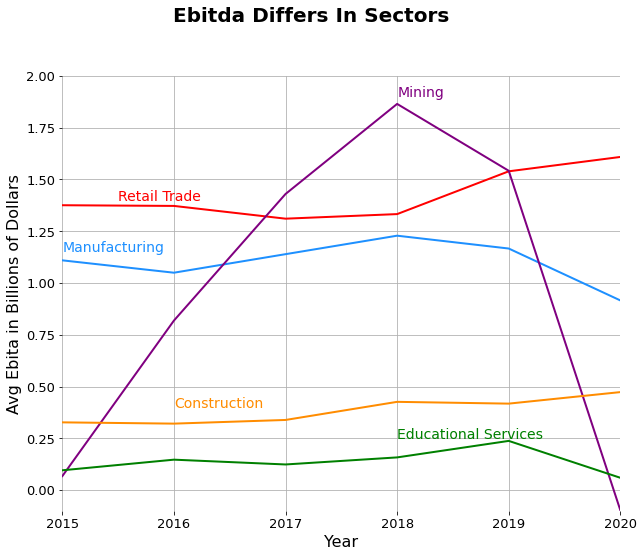

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
fig.suptitle("Ebitda Differs In Sectors",fontsize=20, x=0.47,
y=1.00, fontweight ="bold")
ax.plot(df_lines["YEAR"], df_lines["Manufacturing"], color =
"dodgerblue", lw = 2)
ax.plot(df_lines["YEAR"], df_lines["Retail Trade"], color =
"red", lw = 2)
ax.plot(df_lines["YEAR"], df_lines["Mining"], color = "purple", lw = 2)
ax.plot(df_lines["YEAR"], df_lines["Construction"], color = "darkorange", lw = 2)
ax.plot(df_lines["YEAR"], df_lines["Educational Services"], color = "green", lw = 2)
#ax.set_title("Ebitda Avg In Billions, by year", loc='left', fontsize=18)
ax.grid()
ax.set_facecolor('#F2F2F2')
ax.annotate("Manufacturing", xy=(2015,1.15), color="dodgerblue" , fontsize=14)
ax.annotate("Retail Trade", xy=(2015.5, 1.4), color="red", fontsize=14)
ax.annotate("Mining", xy=(2018,1.9), color="purple", fontsize=14) 
ax.annotate("Educational Services", xy=(2018, 0.25), color="green", fontsize=14)
ax.annotate("Construction", xy=(2016,0.4), color="darkorange", fontsize=14)
ax.set(xlim=(2015, 2020), ylim=(-0.1, 2.0))
ax.set_xlabel("Year",fontsize=16)
ax.set_ylabel("Avg Ebita in Billions of Dollars",fontsize=16)
# xlabels = ["2000", "' 04", "' 08","' 12"]
# ylabels = ["0", "25", "50", "75", "100%"]
# ax.set_xticklabels(xlabels)
# ax.set_yticklabels(ylabels)
ax.tick_params(labelsize=13)
ax.set_frame_on(False)

## Ebitda Differs In States

In [ ]:
CA = df[(df.bq_company_address1_state == "CA")]
NY = df[(df.bq_company_address1_state == "NY")]
TX = df[(df.bq_company_address1_state == "TX")]
WI = df[(df.bq_company_address1_state == "WI")]
WV = df[(df.bq_company_address1_state == "WV")]
WA = df[(df.bq_company_address1_state == "WA")]

In [ ]:
CA_avg = CA.groupby(["bq_year"]).mean().reset_index()
NY_avg = NY.groupby(["bq_year"]).mean().reset_index()
TX_avg = TX.groupby(["bq_year"]).mean().reset_index()
WI_avg = WI.groupby(["bq_year"]).mean().reset_index()
WV_avg = WV.groupby(["bq_year"]).mean().reset_index()
WA_avg = WA.groupby(["bq_year"]).mean().reset_index()

In [ ]:
df_lines = pd.concat([year, CA_avg["bq_ebitda"]/1000000000, NY_avg["bq_ebitda"]/1000000000, TX_avg["bq_ebitda"]/1000000000,
                       WI_avg["bq_ebitda"]/1000000000, WV_avg["bq_ebitda"]/1000000000, WA_avg["bq_ebitda"]/1000000000], axis=1, 
                      keys=["YEAR", "CA", "NY", "TX", "WI", "WV","WA"])

df_lines

,YEAR,CA,NY,TX,WI,WV,WA
0,2015,0.902807,1.119902,1.161626,0.461432,-0.015067,1.396313
1,2016,0.868823,1.142462,1.222060,0.523962,0.080754,1.538768
2,2017,0.909801,1.285251,1.402535,0.604107,0.100934,1.760866
3,2018,0.966766,1.204322,1.756768,0.612220,0.141180,2.086717
4,2019,0.983844,1.145483,1.569819,0.676404,0.132520,2.133538
5,2020,0.972052,0.694673,0.632719,0.534572,0.056614,2.293020


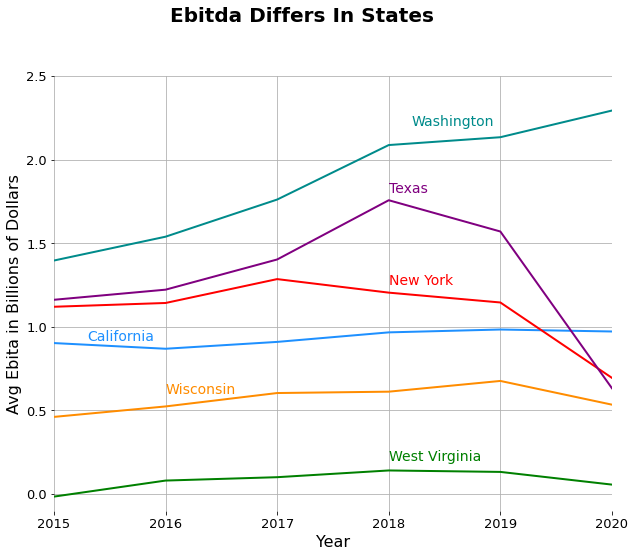

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
fig.suptitle("Ebitda Differs In States",fontsize=20, x=0.47,
y=1.00, fontweight ="bold")
ax.plot(df_lines["YEAR"], df_lines["CA"], color =
"dodgerblue", lw = 2)
ax.plot(df_lines["YEAR"], df_lines["NY"], color =
"red", lw = 2)
ax.plot(df_lines["YEAR"], df_lines["TX"], color = "purple", lw = 2)
ax.plot(df_lines["YEAR"], df_lines["WI"], color = "darkorange", lw = 2)
ax.plot(df_lines["YEAR"], df_lines["WV"], color = "green", lw = 2)
ax.plot(df_lines["YEAR"], df_lines["WA"], color = "darkcyan", lw = 2)
#ax.set_title("Ebitda Avg In Billions, by year", loc='left', fontsize=18)
ax.grid()
#ax.set_facecolor('#F2F2F2')
ax.annotate("California", xy=(2015.3,0.92), color="dodgerblue" , fontsize=14)
ax.annotate("New York", xy=(2018, 1.25), color="red", fontsize=14)
ax.annotate("Texas", xy=(2018,1.8), color="purple", fontsize=14) 
ax.annotate("West Virginia", xy=(2018, 0.2), color="green", fontsize=14)
ax.annotate("Wisconsin", xy=(2016,0.6), color="darkorange", fontsize=14)
ax.annotate("Washington", xy=(2018.2,2.2), color="darkcyan", fontsize=14)
ax.set(xlim=(2015, 2020), ylim=(-0.1, 2.5))
ax.set_xlabel("Year",fontsize=16)
ax.set_ylabel("Avg Ebita in Billions of Dollars",fontsize=16)
# xlabels = ["2000", "' 04", "' 08","' 12"]
# ylabels = ["0", "25", "50", "75", "100%"]
# ax.set_xticklabels(xlabels)
# ax.set_yticklabels(ylabels)
ax.tick_params(labelsize=13)
ax.set_frame_on(False)

## Aggregation of Statistics in U.S. Public Companies

In [ ]:
# Load the statistics_by_us_ts data
stats_by_us_ts = pd.read_csv("/content/drive/MyDrive/BrightQuery_Project/cleaned_data/statistics_by_us_ts.csv")
stats_by_us_ts = stats_by_us_ts[(stats_by_us_ts.bq_year >= 2015) & (stats_by_us_ts.bq_year <= 2020)]
stats_by_us_ts = stats_by_us_ts.drop([stats_by_us_ts.columns[0]], axis = 1)
stats_by_us_ts

,bq_year,bq_number_of_companies_in_us_ts,bq_number_of_companies_in_us_ts_pub,bq_return_on_assets_us_med,bq_return_on_assets_us_stdev,bq_return_on_assets_us_avg,bq_return_on_assets_us_tot,bq_return_on_assets_us_pub_med,bq_return_on_assets_us_pub_stdev,bq_return_on_assets_us_pub_avg,bq_return_on_assets_us_pub_tot,bq_growth_total_assets_1yr_us_med,bq_growth_total_assets_1yr_us_stdev,bq_growth_total_assets_1yr_us_avg,bq_growth_total_assets_1yr_us_tot,bq_growth_total_assets_1yr_us_pub_med,bq_growth_total_assets_1yr_us_pub_stdev,bq_growth_total_assets_1yr_us_pub_avg,bq_growth_total_assets_1yr_us_pub_tot,bq_gross_profit_margin_us_med,bq_gross_profit_margin_us_stdev,bq_gross_profit_margin_us_avg,bq_gross_profit_margin_us_tot,bq_gross_profit_margin_us_pub_med,bq_gross_profit_margin_us_pub_stdev,bq_gross_profit_margin_us_pub_avg,bq_gross_profit_margin_us_pub_tot,bq_no_profit_sharing_ind_us_avg,bq_no_profit_sharing_ind_us_tot,bq_no_profit_sharing_ind_us_pub_avg,bq_no_profit_sharing_ind_us_pub_tot,bq_money_purchase_plan_ind_us_avg,bq_money_purchase_plan_ind_us_tot,bq_money_purchase_plan_ind_us_pub_avg,bq_money_purchase_plan_ind_us_pub_tot,bq_tax_and_interest_us_med,bq_tax_and_interest_us_stdev,bq_tax_and_interest_us_avg,bq_tax_and_interest_us_tot,bq_tax_and_interest_us_pub_med,...,bq_growth_welfare_score_1yr_us_pub_stdev,bq_growth_welfare_score_1yr_us_pub_avg,bq_growth_welfare_score_1yr_us_pub_tot,bq_stock_bonus_ind_us_avg,bq_stock_bonus_ind_us_tot,bq_stock_bonus_ind_us_pub_avg,bq_stock_bonus_ind_us_pub_tot,bq_tot_plans_ct_us_med,bq_tot_plans_ct_us_stdev,bq_tot_plans_ct_us_avg,bq_tot_plans_ct_us_tot,bq_tot_plans_ct_us_pub_med,bq_tot_plans_ct_us_pub_stdev,bq_tot_plans_ct_us_pub_avg,bq_tot_plans_ct_us_pub_tot,bq_profit_plan_no_co_contribs_ind_us_avg,bq_profit_plan_no_co_contribs_ind_us_tot,bq_profit_plan_no_co_contribs_ind_us_pub_avg,bq_profit_plan_no_co_contribs_ind_us_pub_tot,bq_partic_curr_welf_eoy_ct_us_med,bq_partic_curr_welf_eoy_ct_us_stdev,bq_partic_curr_welf_eoy_ct_us_avg,bq_partic_curr_welf_eoy_ct_us_tot,bq_partic_curr_welf_eoy_ct_us_pub_med,bq_partic_curr_welf_eoy_ct_us_pub_stdev,bq_partic_curr_welf_eoy_ct_us_pub_avg,bq_partic_curr_welf_eoy_ct_us_pub_tot,bq_revenue_us_med,bq_revenue_us_stdev,bq_revenue_us_avg,bq_revenue_us_tot,bq_revenue_us_pub_med,bq_revenue_us_pub_stdev,bq_revenue_us_pub_avg,bq_revenue_us_pub_tot,bq_vision_insurance_ind_us_avg,bq_vision_insurance_ind_us_tot,bq_vision_insurance_ind_us_pub_avg,bq_vision_insurance_ind_us_pub_tot,bq_company_fgn_address1_cntry
5,2015,778754,3238,0.050562,0.786973,0.055031,39487.0,0.016266,12.002355,-0.318515,-979.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400025,0.205012,0.425001,304924.0,0.470292,1.451701,0.489417,1466.0,0.228340,177821,0.097900,317,0.014219,11073,0.013589,44,75244.0,7.050783e+07,1.778172e+06,1.275963e+12,16982000.0,...,1.314731,0.191987,604.0,0.004957,3860,0.053428,173,1,1.609801,1.207935,940684,2,4.849761,3.789376,12270,0.202597,157773,0.116430,377,0,2969.484286,86.350058,67245453,585.0,33525.259130,6086.380482,19707700,2022560.0,1.305583e+09,3.896115e+07,2.795735e+13,524206000.0,1.894770e+10,4.973084e+09,1.541159e+13,0.043933,34213,0.630327,2041,United States
6,2016,788523,3317,0.050134,0.390611,0.054490,39576.0,0.013697,5.849778,-0.167882,-538.0,0.004713,3.354893,0.096750,65633.0,0.040524,2.177125,0.160444,488.0,0.397344,0.183048,0.422142,306558.0,0.471860,0.636714,0.513559,1599.0,0.225783,178035,0.100392,333,0.012515,9868,0.013265,44,84732.0,6.908025e+07,1.872364e+06,1.359904e+12,17638000.0,...,1.513824,0.249798,804.0,0.004935,3891,0.053361,177,1,1.484814,1.230579,970340,2,4.698921,3.684052,12220,0.194495,153364,0.097980,325,0,3007.341935,87.676590,69135008,598.0,34315.532345,6082.536328,20175773,2075381.0,1.286325e+09,3.925231e+07,2.850907e+13,515874256.0,1.840288e+10,4.876621e+09,1.569784e+13,0.047385,37364,0.649985,2156,United States
7,2017,792867,3381,0.049207,0.064632,0.053024,38723.0,0.015189,0.788652,-0.108298,-357.0,0.008815,1.998283,0.080587,55233.0,0.059990,

In [ ]:
financial_stats_features = pd.read_excel("/content/drive/MyDrive/BrightQuery_Project/meta-model/Financial_stats_features.xlsx")
financial_stats_features

,Table name,Field description,Field name,Data frequency,Data type,Category,Level of aggregation of statistic,Statistic if aggregated,Public companies only
0,statistics_by_us_ts,Asset Turnover U.S. Public Companies Average,bq_asset_turnover_us_pub_avg,Annual Time Series (TS),Float,"Macro, industry & regional metrics",U.S.,Average,True
1,statistics_by_us_ts,Asset Turnover U.S. Public Companies Median,bq_asset_turnover_us_pub_med,Annual Time Series (TS),Float,"Macro, industry & regional metrics",U.S.,Median,True
2,statistics_by_us_ts,Asset Turnover U.S. Public Companies Total,bq_asset_turnover_us_pub_tot,Annual Time Series (TS),Integer,"Macro, industry & regional metrics",U.S.,Total,True
3,statistics_by_us_ts,Cost of Revenue (COR) Per Employee U.S. Public...,bq_cor_per_emp_us_pub_avg,Annual Time Series (TS),Float,"Macro, industry & regional metrics",U.S.,Average,True
4,statistics_by_us_ts,Cost of Revenue (COR) Per Employee U.S. Public...,bq_cor_per_emp_us_pub_med,Annual Time Series (TS),Float,"Macro, industry & regional metrics",U.S.,Median,True
...,...,...,...,...,...,...,...,...,...
127,statistics_by_us_ts,Total Assets Per Employee U.S. Public Companie...,bq_total_assets_per_emp_us_pub_med,Annual Time Series (TS),Float,"Macro, industry & regional metrics",U.S.,Median,True
128,statistics_by_us_ts,Total Assets Per Employee U.S. Public Companie...,bq_total_assets_per_emp_us_pub_tot,Annual Time Series (TS),Integer,"Macro, industry & regional metrics",U.S.,Total,True
129,statistics_by_us_ts,Total Assets U.S. Public Companies Average,bq_total_assets_us_pub_avg,Annual Time Series (TS),Float,"Macro, industry & regional metrics",U.S.,Average,True
130,statistics_by_us_ts,Total Assets U.S. Public Companies Median,bq_total_assets_us_pub_med,Annual Time Series (TS),Float,"Macro, industry & regional metrics",U.S.,Median,True


In [ ]:
selected_stats_features = ["bq_year"]
selected_stats_features.extend(list(financial_stats_features["Field name"]))

In [ ]:
stats_by_us_df = feature_selection(stats_by_us_ts, selected_stats_features)
stats_by_us_df

,bq_year,bq_asset_turnover_us_pub_avg,bq_asset_turnover_us_pub_med,bq_asset_turnover_us_pub_tot,bq_cor_per_emp_us_pub_avg,bq_cor_per_emp_us_pub_med,bq_cor_per_emp_us_pub_tot,bq_cor_us_pub_avg,bq_cor_us_pub_med,bq_cor_us_pub_tot,bq_ebitda_margin_us_pub_avg,bq_ebitda_margin_us_pub_med,bq_ebitda_margin_us_pub_tot,bq_ebitda_per_emp_us_pub_avg,bq_ebitda_per_emp_us_pub_med,bq_ebitda_per_emp_us_pub_tot,bq_ebitda_us_pub_avg,bq_ebitda_us_pub_med,bq_ebitda_us_pub_tot,bq_current_employees_plan_us_pub_avg,bq_current_employees_plan_us_pub_med,bq_current_employees_plan_us_pub_tot,bq_emp_growth_rate_1yr_us_pub_avg,bq_emp_growth_rate_1yr_us_pub_med,bq_emp_growth_rate_1yr_us_pub_tot,bq_gross_profit_margin_us_pub_avg,bq_gross_profit_margin_us_pub_med,bq_gross_profit_margin_us_pub_tot,bq_gross_profit_per_emp_us_pub_avg,bq_gross_profit_per_emp_us_pub_med,bq_gross_profit_per_emp_us_pub_tot,bq_gross_profit_us_pub_avg,bq_gross_profit_us_pub_med,bq_gross_profit_us_pub_tot,bq_growth_cor_1yr_us_pub_avg,bq_growth_cor_1yr_us_pub_med,bq_growth_cor_1yr_us_pub_tot,bq_growth_cor_per_emp_1yr_us_pub_avg,bq_growth_cor_per_emp_1yr_us_pub_med,bq_growth_cor_per_emp_1yr_us_pub_tot,...,bq_net_income_us_pub_tot,bq_net_profit_margin_us_pub_avg,bq_net_profit_margin_us_pub_med,bq_net_profit_margin_us_pub_tot,bq_operating_expenses_per_emp_us_pub_avg,bq_operating_expenses_per_emp_us_pub_med,bq_operating_expenses_per_emp_us_pub_tot,bq_operating_expenses_us_pub_avg,bq_operating_expenses_us_pub_med,bq_operating_expenses_us_pub_tot,bq_operating_income_per_emp_us_pub_avg,bq_operating_income_per_emp_us_pub_med,bq_operating_income_per_emp_us_pub_tot,bq_operating_income_us_pub_avg,bq_operating_income_us_pub_med,bq_operating_income_us_pub_tot,bq_return_on_assets_us_pub_avg,bq_return_on_assets_us_pub_med,bq_return_on_assets_us_pub_tot,bq_return_on_sales_us_pub_avg,bq_return_on_sales_us_pub_med,bq_return_on_sales_us_pub_tot,bq_revenue_per_emp_us_pub_avg,bq_revenue_per_emp_us_pub_med,bq_revenue_per_emp_us_pub_tot,bq_revenue_us_pub_avg,bq_revenue_us_pub_med,bq_revenue_us_pub_tot,bq_tax_and_interest_per_emp_us_pub_avg,bq_tax_and_interest_per_emp_us_pub_med,bq_tax_and_interest_per_emp_us_pub_tot,bq_tax_and_interest_us_pub_avg,bq_tax_and_interest_us_pub_med,bq_tax_and_interest_us_pub_tot,bq_total_assets_per_emp_us_pub_avg,bq_total_assets_per_emp_us_pub_med,bq_total_assets_per_emp_us_pub_tot,bq_total_assets_us_pub_avg,bq_total_assets_us_pub_med,bq_total_assets_us_pub_tot
5,2015,0.773142,0.557700,2376.0,4.196596e+06,210167.0,1.300525e+10,3.035002e+09,173383000.0,9.405472e+12,-7.437107,0.131016,-22274.0,1.347556e+06,57306.0,4.176077e+09,8.659461e+08,68628000.0,2.683567e+12,6810.496294,734.0,22052387,0.198903,0.035054,626.0,0.489417,0.470292,1466.0,2.817245e+06,212190.0,8.730641e+09,1.938082e+09,223000000.0,6.006116e+12,NaN,NaN,NaN,NaN,NaN,NaN,...,1.106445e+12,-7.970074,0.047914,-23870.0,2.127246e+06,203543.0,6.592337e+09,1.375680e+09,172215000.0,4.263233e+12,6.899980e+05,37726.0,2.138304e+09,5.624015e+08,37600000.0,1.742882e+12,-0.318515,0.016266,-979.0,-7.156144,0.084808,-21433.0,7.013841e+06,467218.0,2.173589e+10,4.973084e+09,524206000.0,1.541159e+13,415248.475637,17962.0,1.286855e+09,2.053684e+08,16982000.0,6.364368e+11,3.046506e+07,1118175.0,9.361914e+10,2.068674e+10,1.141151e+09,6.357034e+13
6,2016,0.748458,0.552340,2398.0,3.097516e+06,204412.0,9.970902e+09,2.953295e+09,180190000.0,9.506658e+12,-7.636221,0.133884,-23772.0,1.352916e+06,61373.0,4.355037e+09,8.762613e+08,70935000.0,2.820685e+12,6819.845342,750.0,22621427,0.247963,0.028607,798.0,0.513559,0.471860,1599.0,2.659376e+06,214916.0,8.560532e+09,1.923325e+09,223849702.0,6.191184e+12,0.160654,0.000000,493.0,0.156551,0.000000,480.0,...,1.157216e+12,-7.870528,0.046738,-24501.0,1.889376e+06,205423.0,6.081901e+09,1.353307e+09,173639000.0,4.356296e+12,7.699999e+05,36612.0,2.478630e+09,5.700181e+08,39795000.0,1.834888e+12,-0.167882,0.013697,-538.0,-8.183579,0.081509,-25475.0,5.756892e+06,466867.0,1.853144e+10,4.876621e+09,515874256.0,1.5

In [ ]:
plot_features = ['bq_year','bq_ebitda_us_pub_tot',
'bq_gross_profit_us_pub_tot',
'bq_operating_income_us_pub_tot',
'bq_net_income_us_pub_tot']

stats_df = feature_selection(stats_by_us_df, plot_features)
stats_df

,bq_year,bq_ebitda_us_pub_tot,bq_gross_profit_us_pub_tot,bq_operating_income_us_pub_tot,bq_net_income_us_pub_tot
5,2015,2.683567e+12,6.006116e+12,1.742882e+12,1.106445e+12
6,2016,2.820685e+12,6.191184e+12,1.834888e+12,1.157216e+12
7,2017,3.141834e+12,6.738369e+12,2.100125e+12,1.353414e+12
8,2018,3.414994e+12,7.223317e+12,2.258535e+12,1.617513e+12
9,2019,3.468298e+12,7.490716e+12,2.191787e+12,1.558866e+12
10,2020,2.520321e+12,6.307642e+12,1.465631e+12,9.681404e+11


In [ ]:
trillion = 10**12
df_lines = stats_df[['bq_ebitda_us_pub_tot',
'bq_gross_profit_us_pub_tot',
'bq_operating_income_us_pub_tot',
'bq_net_income_us_pub_tot']]/trillion

df_lines["YEAR"] = stats_df["bq_year"]

df_lines

,bq_ebitda_us_pub_tot,bq_gross_profit_us_pub_tot,bq_operating_income_us_pub_tot,bq_net_income_us_pub_tot,YEAR
5,2.683567,6.006116,1.742882,1.106445,2015
6,2.820685,6.191184,1.834888,1.157216,2016
7,3.141834,6.738369,2.100125,1.353414,2017
8,3.414994,7.223317,2.258535,1.617513,2018
9,3.468298,7.490716,2.191787,1.558866,2019
10,2.520321,6.307642,1.465631,0.968140,2020


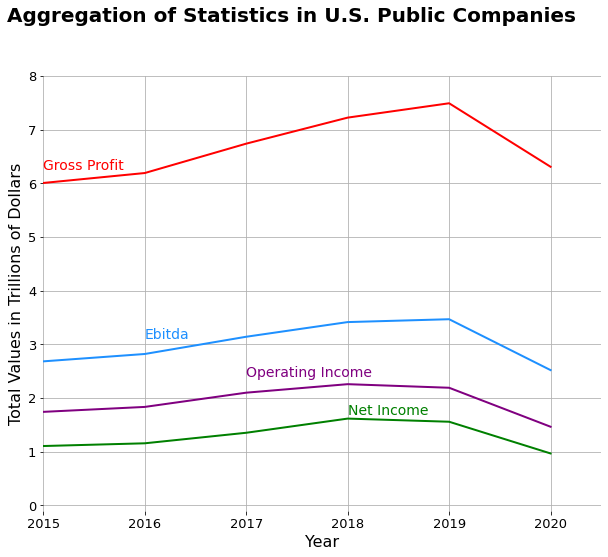

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
fig.suptitle("Aggregation of Statistics in U.S. Public Companies",fontsize=20, x=0.47,
y=1.00, fontweight ="bold")
ax.plot(df_lines["YEAR"], df_lines["bq_ebitda_us_pub_tot"], color =
"dodgerblue", lw = 2)
ax.plot(df_lines["YEAR"], df_lines["bq_gross_profit_us_pub_tot"], color =
"red", lw = 2)
ax.plot(df_lines["YEAR"], df_lines["bq_operating_income_us_pub_tot"], color = "purple", lw = 2)
ax.plot(df_lines["YEAR"], df_lines["bq_net_income_us_pub_tot"], color = "green", lw = 2)
#ax.set_title("Totals In Trillion, by year", loc='left', fontsize=18)
ax.grid()
ax.set_facecolor('#F2F2F2')
ax.annotate("Ebitda", xy=(2016,3.1), color="dodgerblue" , fontsize=14)
ax.annotate("Gross Profit", xy=(2015, 6.25), color="red", fontsize=14)
ax.annotate("Operating Income", xy=(2017,2.4), color="purple", fontsize=14) 
ax.annotate("Net Income", xy=(2018, 1.7), color="green", fontsize=14)
ax.set(xlim=(2015, 2020.5), ylim=(-0.1, 8))
ax.set_xlabel("Year",fontsize=16)
ax.set_ylabel("Total Values in Trillions of Dollars",fontsize=16)
ax.tick_params(labelsize=13)
ax.set_frame_on(False)